## COVID 19 Data Analysis

#### Business Understanding

### Aim of analysis
1. Worst hit Provinces - Most Death, Most Confirmed Cases
2. Worst hit Country  Most Death, Most Confirmed Cases
3. After what day cases spiked up in US

### Libraries Required

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

### Data Understanding and Prep

https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset?select=time_series_covid_19_confirmed.csv

In [54]:
covid_data = pd.read_csv('covid_19_data.csv')

In [55]:
covid_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [56]:
covid_data_us_time_series = pd.read_csv('time_series_covid_19_confirmed_US.csv')

In [57]:
covid_data_us_time_series.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,151,151,151,151,152,152,152,154,154,154
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,15,16,16,19,19,19,19,19,21,21
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,2156,2173,2198,2256,2299,2329,2427,2542,2589,2646
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,68,68,69,69,69,69,69,69,69,69


In [58]:
covid_line_data = pd.read_csv('COVID19_open_line_list.csv')

In [59]:
covid_line_data.head()

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Modelling

In [60]:
def plot_bar(data,column,ylabel,title):
    data[column].sort_values( ascending = False)[0:14].plot(kind='bar')
    plt.ylabel(ylabel)
    plt.title(title)

#### There is no null values. For categorical variables, we have mostly used grouped plot and hence dont need explicit handling

### Worst hit Provinces

In [61]:
grouped_data = covid_data.groupby('Province/State').sum()

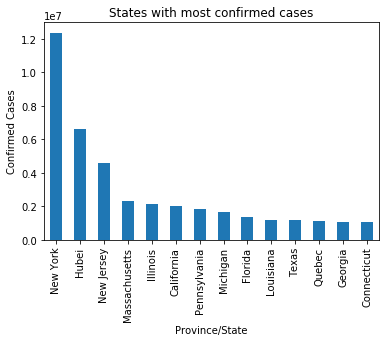

In [14]:
plot_bar(grouped_data, 'Confirmed','Confirmed Cases','States with most confirmed cases')

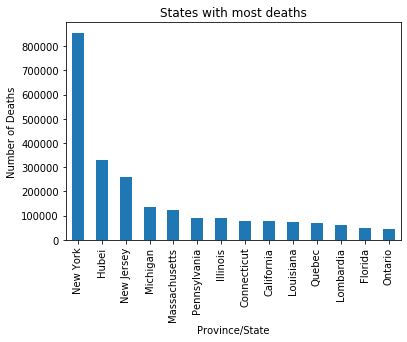

In [15]:
plot_bar(grouped_data, 'Deaths','Number of Deaths','States with most deaths')


### Most affected states are
1. New York
2. Hubei
3. New Jersey
4. Massacheusetts
5. Illinois

***We can also see there are some states with high number of cases but less deaths. 
Let us analyze states with worst death ratio***

In [17]:
grouped_data['Death %'] = 100*grouped_data['Deaths']/grouped_data['Confirmed']


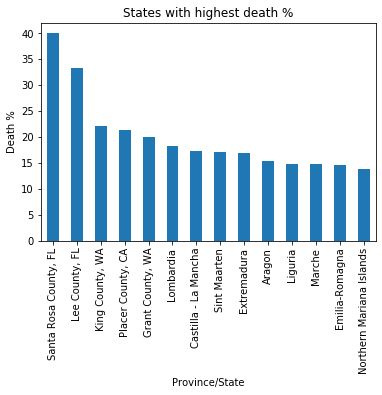

In [18]:
plot_bar(grouped_data, 'Death %','Death %','States with highest death %')


***Santa Rosa County FL, Lee County, FL, ing County WA and Placer County CA have the highest death rate***

#### Let us insepct avergae age in these provinces. Belief is that for provinces with high death ratio, age can be a significant factor. It seems that if age is not significant factor, then health system is not upto mark

#### There are no missing values  here. 
#### For categorical variables we mostly do bar plots 

In [13]:
patient_age_data = covid_line_data[['province','age']].dropna()
patient_age_data['age'] = [int(float(age.split('-')[0])) for age in patient_age_data['age'].values]
patient_age_data['age'] = patient_age_data['age'].astype('int')


In [14]:
mean_ages_by_province = patient_age_data.groupby('province').mean()

In [15]:
mean_ages_by_province = mean_ages_by_province.reset_index()

In [16]:
avg_ages = []
for province in worst_death_ratio:
    avg_age = mean_ages_by_province.loc[mean_ages_by_province['province']==province]
    if(len(avg_age)>=1):
        avg_ages.append(avg_age['age'].values[0])


Text(0.5, 1.0, 'Average age sorted by death ratio')

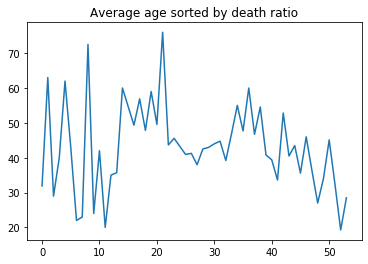

In [17]:
plt.plot(avg_ages)
plt.title('Average age sorted by death ratio')

#### We can see that age is not the only signifacnt factor for death

### Country Level Assoication

In [19]:
grouped_data = covid_data.groupby('Country/Region').sum()

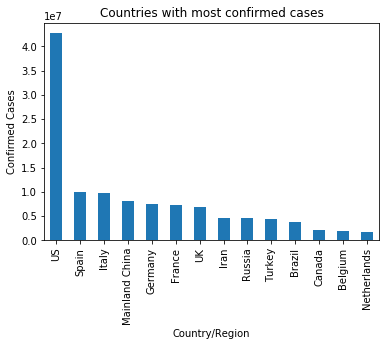

In [20]:
plot_bar(grouped_data, 'Confirmed','Confirmed Cases','Countries with most confirmed cases')


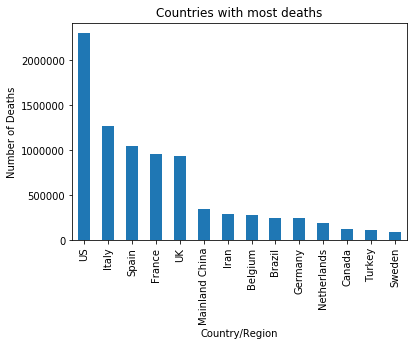

In [21]:
plot_bar(grouped_data, 'Deaths','Number of Deaths','Countries with most deaths')


### China has relatively less deaths ccompared to confiremd cases, UK has higher death ratio

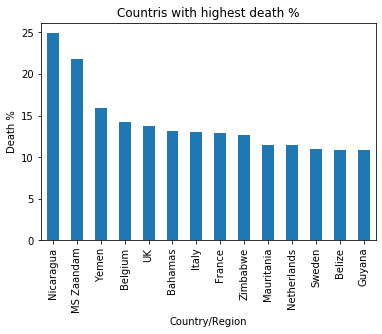

In [22]:
grouped_data['Death %'] = 100*grouped_data['Deaths']/grouped_data['Confirmed']
worst_death_ratio = grouped_data['Death %'].sort_values( ascending = False)[0:100000].index
plot_bar(grouped_data, 'Death %','Death %','Countris with highest death %')

####  High Death % noted in Nicaragua, Belgium and UK

In [35]:
covid_data_us_time_series.groupby('Country_Region').sum().values[0][0]

273609029778.0

### Rise of cases in US

In [49]:
dates = covid_data_us_time_series.groupby('Country_Region').sum().columns[5:]

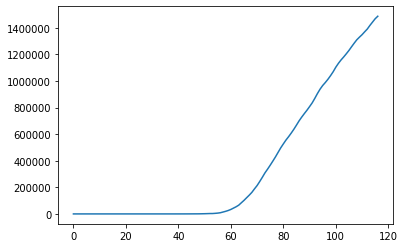

In [52]:
plt.plot(covid_data_us_time_series.groupby('Country_Region').sum()[dates].values[0])

#### As we can see cases spiked up after 60th day